In [3]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
import itertools
import os

warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

brr = np.array(data.return_brr)
btc = np.array(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

kde_brr = KDE(data.return_brr, "Gaussian", kde_brr.h_brot*3)
kde_btc = KDE(data.return_brr, "Gaussian", kde_btc.h_brot*3)

In [4]:
# Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
C1  = Gaussian(dict(rho=0.9),       Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
C2  = t_Copula(dict(rho=0.1, nu=4), Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=2) 
C2c = t_Copula(dict(rho=0.1, nu=4), Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=4) 
C3  = Clayton(dict(theta=0.1),      Law_RS=kde_brr, Law_RF=kde_btc)
C4  = Frank(dict(theta=0.1),        Law_RS=kde_brr, Law_RF=kde_btc)
C5  = Gumbel(dict(theta=3),         Law_RS=kde_brr, Law_RF=kde_btc)
C6  = Plackett(dict(theta=10),      Law_RS=kde_brr, Law_RF=kde_btc)
C7  = Gaussian_Mix_Independent(dict(rho=.9,p=0.7),Law_RS=kde_brr, Law_RF=kde_btc)
Copulae_names = ['Gaussian', 't_Copula', 't_Copula_Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
Copulae_arr   = [C1,C2,C2c,C3,C4,C5,C6,C7]
Copulae = dict(zip(Copulae_names, Copulae_arr))

6.csv
Optimization terminated successfully.
         Current function value: -0.205614
         Iterations: 34
         Function evaluations: 73
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.281130
         Iterations: 87
         Function evaluations: 186
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.274164
         Iterations: 154
         Function evaluations: 295
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.193055
         Iterations: 37
         Function evaluations: 80
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.210579
         Iterations: 39
         Function evaluations: 86
Frank is done.

Optimization terminated successfully.
         Current function value: -0.216332
         Iterations: 35
         Function evaluations: 75
Gumbel is done.

Plackett is done.

Optimization terminated

Optimization terminated successfully.
         Current function value: -0.294407
         Iterations: 67
         Function evaluations: 140
Gauss Mix Indep is done.

2.csv
Optimization terminated successfully.
         Current function value: -0.204086
         Iterations: 31
         Function evaluations: 67
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.308468
         Iterations: 113
         Function evaluations: 222
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.291671
         Iterations: 114
         Function evaluations: 225
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.188440
         Iterations: 33
         Function evaluations: 75
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.208096
         Iterations: 34
         Function evaluations: 75
Frank is done.

Optimization terminated success

Optimization terminated successfully.
         Current function value: -0.232808
         Iterations: 63
         Function evaluations: 129
Gauss Mix Indep is done.

16.csv
Optimization terminated successfully.
         Current function value: -0.181374
         Iterations: 30
         Function evaluations: 65
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.245192
         Iterations: 65
         Function evaluations: 141
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.236334
         Iterations: 122
         Function evaluations: 244
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.160613
         Iterations: 31
         Function evaluations: 68
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.185482
         Iterations: 33
         Function evaluations: 74
Frank is done.

Optimization terminated success

Optimization terminated successfully.
         Current function value: -0.279349
         Iterations: 70
         Function evaluations: 143
Gauss Mix Indep is done.

12.csv
Optimization terminated successfully.
         Current function value: -0.234300
         Iterations: 30
         Function evaluations: 63
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.319377
         Iterations: 66
         Function evaluations: 141
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.305640
         Iterations: 120
         Function evaluations: 230
t_Copula_Capped is done.

Optimization terminated successfully.
         Current function value: -0.233744
         Iterations: 33
         Function evaluations: 74
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.241891
         Iterations: 34
         Function evaluations: 76
Frank is done.

Optimization terminated success

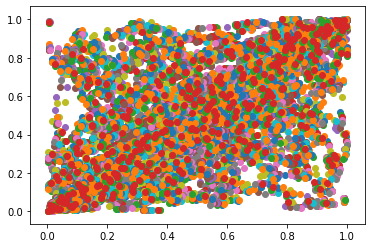

In [32]:
results = []
ls = os.listdir('../processed_data/crix_brr/train/')
ls = [l for l in ls if l.endswith('.csv')]
for file in ls:
    print(file)
    train = pd.read_csv('../processed_data/crix_brr/train/'+file)
    btc = train.loc[:,'log return crix'].iloc[:-1]
    brr = train.loc[:,'log return brr'].iloc[1:]
    u = ECDF(brr)(brr)
    v = ECDF(btc)(btc)
    plt.scatter(u,v)
    paras = []
    likelihood = []
    for C_name in Copulae:
        Copulae[C_name].canonical_calibrate(u,v)
        print(C_name,'is done.\n')
    
    for C_name in Copulae:
        paras.append((C_name,Copulae[C_name].paras))
        
    for C_name in Copulae:
        ln = Copulae[C_name].dependency_likelihood(u,v)
        likelihood.append((C_name,ln))
        
    results.append([paras, likelihood])

In [33]:
c_arr = []
date_range_arr = []
for i, file in enumerate(ls):
    train = pd.read_csv('../processed_data/crix_brr/train/'+file)
    a = pd.DataFrame(results[i][0])
    a.columns = ['Copula_name', 'paras']
    a.index = a.iloc[:,0]
    b = pd.DataFrame(results[i][1])
    b.index = b.iloc[:,0]
    c = pd.concat([a.iloc[:,1],b.iloc[:,1]],axis=1)
    c.columns = ['paras', 'likelihood']
    date_range = train.Date.iloc[-1] +' to ' + train.Date.iloc[0]
    date_range_arr.append(date_range)
    print(date_range)
    c_arr.append(c)

2019-08-01 to 2020-07-31
2019-07-01 to 2020-06-30
2019-09-01 to 2020-08-31
2019-10-01 to 2020-09-30
2020-02-01 to 2021-01-31
2020-01-01 to 2020-12-31
2019-11-01 to 2020-10-31
2019-12-01 to 2020-11-30
2018-03-01 to 2019-02-28
2018-04-01 to 2019-03-31
2018-06-01 to 2019-05-31
2018-05-01 to 2019-04-30
2018-07-01 to 2019-06-30
2018-08-01 to 2019-07-31
2018-10-01 to 2019-09-30
2018-09-01 to 2019-08-31
2018-11-01 to 2019-10-31
2018-12-01 to 2019-11-30
2019-04-01 to 2020-03-31
2019-03-01 to 2020-02-29
2019-01-01 to 2019-12-31
2019-02-01 to 2020-01-31
2019-05-01 to 2020-04-30
2019-06-01 to 2020-05-31


In [34]:
result = pd.concat(dict(zip(date_range_arr, c_arr)), axis=1)

In [35]:
result.iloc[:,[i for i in range(len(result.columns)) if i%2!=0]].style.highlight_max(color = 'lightgreen', axis = 0)

,2018-03-01 to 2019-02-28,2018-04-01 to 2019-03-31,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-01 to 2019-06-30,2018-08-01 to 2019-07-31,2018-09-01 to 2019-08-31,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-01 to 2019-11-30,2019-01-01 to 2019-12-31,2019-02-01 to 2020-01-31,2019-03-01 to 2020-02-29,2019-04-01 to 2020-03-31,2019-05-01 to 2020-04-30,2019-06-01 to 2020-05-31,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-01 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-31,2019-12-01 to 2020-11-30,2020-01-01 to 2020-12-31,2020-02-01 to 2021-01-31
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
Gaussian,0.156973,0.16673,0.147654,0.145125,0.185172,0.180317,0.20403,0.192265,0.195686,0.220949,0.202617,0.230692,0.236713,0.213908,0.218334,0.23546,0.188221,0.203495,0.204167,0.200941,0.2015,0.201244,0.220727,0.229009
t_Copula,0.164797,0.189672,0.18499,0.1867,0.230877,0.228289,0.258758,0.249082,0.242063,0.274181,0.268049,0.300816,0.317423,0.298217,0.299563,0.307125,0.262768,0.265973,0.277458,0.28121,0.303102,0.306278,0.30115,0.295342
t_Copula_Capped,0.164797,0.18982,0.182734,0.184539,0.228501,0.225411,0.2553,0.24377,0.239561,0.27041,0.258637,0.293396,0.308461,0.290256,0.293771,0.303526,0.256775,0.263313,0.272246,0.273608,0.290987,0.293219,0.294052,0.290469
Clayton,0.131407,0.142767,0.128161,0.127655,0.159494,0.156309,0.174775,0.160612,0.16999,0.213678,0.206909,0.233743,0.235148,0.218616,0.223028,0.232094,0.181651,0.193054,0.199855,0.205599,0.197312,0.18844,0.185075,0.198157
Frank,0.134187,0.145026,0.125646,0.129888,0.17073,0.16884,0.197564,0.185477,0.196471,0.221897,0.201815,0.241892,0.259906,0.238321,0.244422,0.254094,0.204366,0.21058,0.215033,0.207318,0.208167,0.208096,0.2174,0.22544
Gumbel,0.144759,0.165427,0.1587,0.154419,0.195828,0.191352,0.219575,0.21089,0.205329,0.220607,0.20419,0.232636,0.246463,0.227674,0.230099,0.244828,0.206518,0.216332,0.2207,0.218103,0.238089,0.244401,0.257477,0.249954
Plackett,inf,inf,inf,4.07578,inf,inf,3.90569,4.24747,6.35868,inf,5.91834,6.86951,5.42388,inf,inf,6.31512,3.20206,inf,3.33611,3.38999,inf,inf,3.55913,3.23864
Gauss Mix Indep,0.163375,0.190333,0.182632,0.188774,0.232632,0.232808,0.264326,0.258608,0.254789,0.287386,0.279349,0.311699,0.333553,0.305687,0.306682,0.313186,0.266057,0.264378,0.275639,0.274254,0.294407,0.297944,0.295485,0.293751


In [36]:
result.iloc[:,[i for i in range(len(result.columns)) if i%2==0]]

,2018-03-01 to 2019-02-28,2018-04-01 to 2019-03-31,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-01 to 2019-06-30,2018-08-01 to 2019-07-31,2018-09-01 to 2019-08-31,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-01 to 2019-11-30,...,2019-05-01 to 2020-04-30,2019-06-01 to 2020-05-31,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-01 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-31,2019-12-01 to 2020-11-30,2020-01-01 to 2020-12-31,2020-02-01 to 2021-01-31
,paras,paras,paras,paras,paras,paras,paras,paras,paras,paras,...,paras,paras,paras,paras,paras,paras,paras,paras,paras,paras
Gaussian,{'rho': 0.5139848084043619},{'rho': 0.5235739298227041},{'rho': 0.49760634098464407},{'rho': 0.4969863971679863},{'rho': 0.553851624718888},{'rho': 0.5475173761829444},{'rho': 0.5773530049431641},{'rho': 0.5629810754999245},{'rho': 0.5798408182243637},{'rho': 0.6092294939039599},...,{'rho': 0.6081904623040812},{'rho': 0.6262183647187036},{'rho': 0.5705906578943031},{'rho': 0.5887761458499947},{'rho': 0.589363220409052},{'rho': 0.5849922828640257},{'rho': 0.5893300975219378},{'rho': 0.5895487847535761},{'rho': 0.5954790162424375},{'rho': 0.609538572490878}
t_Copula,"{'rho': 0.5071804289801147, 'nu': 5.5700547721...","{'rho': 0.5199891606920768, 'nu': 3.6577078948...","{'rho': 0.4881290562160793, 'nu': 2.9917201269...","{'rho': 0.4920387093670607, 'nu': 2.5574558087...","{'rho': 0.5538256374849195, 'nu': 2.5134839101...","{'rho': 0.5511810330268627, 'nu': 2.4721587281...","{'rho': 0.5904674664768246, 'nu': 2.4153250764...","{'rho': 0.5746921533443763, 'nu': 2.2136062200...","{'rho': 0.5915878999604023, 'nu': 2.3119124978...","{'rho': 0.6211169734271074, 'nu': 2.2033076520...",...,"{'rho': 0.6470021571019776, 'nu': 2.2068668991...","{'rho': 0.6535220702018723, 'nu': 2.3498652326...","{'rho': 0.6007573157154475, 'nu': 2.1562222429...","{'rho': 0.6026857192043884, 'nu': 2.3845380908...","{'rho': 0.6099968759439226, 'nu': 2.1867285902...","{'rho': 0.6008975677148216, 'nu': 2.0297635751...","{'rho': 0.6079814292919239, 'nu': 2.0000000000...","{'rho': 0.6079814292919239, 'nu': 2.0000000000...","{'rho': 0.6098220595881652, 'nu': 2.1372744316...","{'rho': 0.6176104668626194, 'nu': 2.1756123397..."
t_Copula_Capped,"{'rho': 0.5071804429553377, 'nu': 5.5700547243...","{'rho': 0.5241504759707052, 'nu': 4.0000000000...","{'rho': 0.502820486932033, 'nu': 4.00000000000...","{'rho': 0.517322748528062, 'nu': 4.00000000000...","{'rho': 0.5795643728635751, 'nu': 4.0000000000...","{'rho': 0.5773837099786188, 'nu': 4.0000000000...","{'rho': 0.616122716596823, 'nu': 4.00000000000...","{'rho': 0.6062528954775497, 'nu': 4.0000000000...","{'rho': 0.616122716596823, 'nu': 4.00000000000...","{'rho': 0.6469288524266642, 'nu': 4.0000000000...",...,"{'rho': 0.6740316952759793, 'nu': 4.0000000000...","{'rho': 0.6740316952759793, 'nu': 4.0000000000...","{'rho': 0.6330470912753411, 'nu': 4.0000000000...","{'rho': 0.6330470912753411, 'nu': 4.0000000000...","{'rho': 0.6444125973049288, 'nu': 4.0000000000...","{'rho': 0.6427975159053518, 'nu': 4.0000000000...","{'rho': 0.6499282082740667, 'nu': 4.0000000000...","{'rho': 0.6499282082740667, 'nu': 4.0000000000...","{'rho': 0.6533822567977976, 'nu': 4.0000000000...","{'rho': 0.6533822567977976, 'nu': 4.0000000000..."
Clayton,{'theta': 0.7963480794195221},{'theta': 0.8511739713239906},{'theta': 0.7986234107383957},{'theta': 0.8005455350922096},{'theta': 0.9391151543594439},{'theta': 0.9300969056437463},{'theta': 1.0115250324403335},{'theta': 0.9536338255041867},{'theta': 0.9934517856909134},{'theta': 1.172035415181507},...,{'theta': 1.2374129437520585},{'theta': 1.2628431524832437},{'theta': 1.059451611913414},{'theta': 1.0890987347859562},{'theta': 1.1229819713125326},{'theta': 1.1519940644108686},{'theta': 1.1201604620643433},{'theta': 1.0879665952457491},{'theta': 1.0707713070812905},{'theta': 1.12216534847286}
Frank,{'theta': 3.418674442418609},{'theta': 3.6245286888360315},{'theta': 3.3

In [37]:
result.iloc[[0,1,2,3,4,5,7],[i for i in range(len(result.columns)) if i%2!=0]].style.highlight_max(color = 'lightgreen', axis = 0)

,2018-03-01 to 2019-02-28,2018-04-01 to 2019-03-31,2018-05-01 to 2019-04-30,2018-06-01 to 2019-05-31,2018-07-01 to 2019-06-30,2018-08-01 to 2019-07-31,2018-09-01 to 2019-08-31,2018-10-01 to 2019-09-30,2018-11-01 to 2019-10-31,2018-12-01 to 2019-11-30,2019-01-01 to 2019-12-31,2019-02-01 to 2020-01-31,2019-03-01 to 2020-02-29,2019-04-01 to 2020-03-31,2019-05-01 to 2020-04-30,2019-06-01 to 2020-05-31,2019-07-01 to 2020-06-30,2019-08-01 to 2020-07-31,2019-09-01 to 2020-08-31,2019-10-01 to 2020-09-30,2019-11-01 to 2020-10-31,2019-12-01 to 2020-11-30,2020-01-01 to 2020-12-31,2020-02-01 to 2021-01-31
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
Gaussian,0.156973,0.16673,0.147654,0.145125,0.185172,0.180317,0.20403,0.192265,0.195686,0.220949,0.202617,0.230692,0.236713,0.213908,0.218334,0.23546,0.188221,0.203495,0.204167,0.200941,0.2015,0.201244,0.220727,0.229009
t_Copula,0.164797,0.189672,0.18499,0.1867,0.230877,0.228289,0.258758,0.249082,0.242063,0.274181,0.268049,0.300816,0.317423,0.298217,0.299563,0.307125,0.262768,0.265973,0.277458,0.28121,0.303102,0.306278,0.30115,0.295342
t_Copula_Capped,0.164797,0.18982,0.182734,0.184539,0.228501,0.225411,0.2553,0.24377,0.239561,0.27041,0.258637,0.293396,0.308461,0.290256,0.293771,0.303526,0.256775,0.263313,0.272246,0.273608,0.290987,0.293219,0.294052,0.290469
Clayton,0.131407,0.142767,0.128161,0.127655,0.159494,0.156309,0.174775,0.160612,0.16999,0.213678,0.206909,0.233743,0.235148,0.218616,0.223028,0.232094,0.181651,0.193054,0.199855,0.205599,0.197312,0.18844,0.185075,0.198157
Frank,0.134187,0.145026,0.125646,0.129888,0.17073,0.16884,0.197564,0.185477,0.196471,0.221897,0.201815,0.241892,0.259906,0.238321,0.244422,0.254094,0.204366,0.21058,0.215033,0.207318,0.208167,0.208096,0.2174,0.22544
Gumbel,0.144759,0.165427,0.1587,0.154419,0.195828,0.191352,0.219575,0.21089,0.205329,0.220607,0.20419,0.232636,0.246463,0.227674,0.230099,0.244828,0.206518,0.216332,0.2207,0.218103,0.238089,0.244401,0.257477,0.249954
Gauss Mix Indep,0.163375,0.190333,0.182632,0.188774,0.232632,0.232808,0.264326,0.258608,0.254789,0.287386,0.279349,0.311699,0.333553,0.305687,0.306682,0.313186,0.266057,0.264378,0.275639,0.274254,0.294407,0.297944,0.295485,0.293751


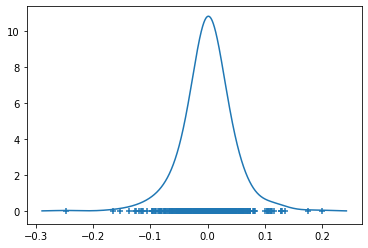

In [38]:
kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

kde_brr = KDE(data.return_brr, "Gaussian", kde_brr.h_brot*3)
kde_btc = KDE(data.return_brr, "Gaussian", kde_btc.h_brot*3)
kde_brr.plot_density()

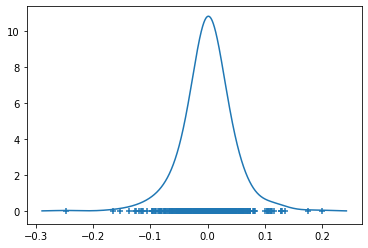

In [39]:
kde_brr.plot_density()

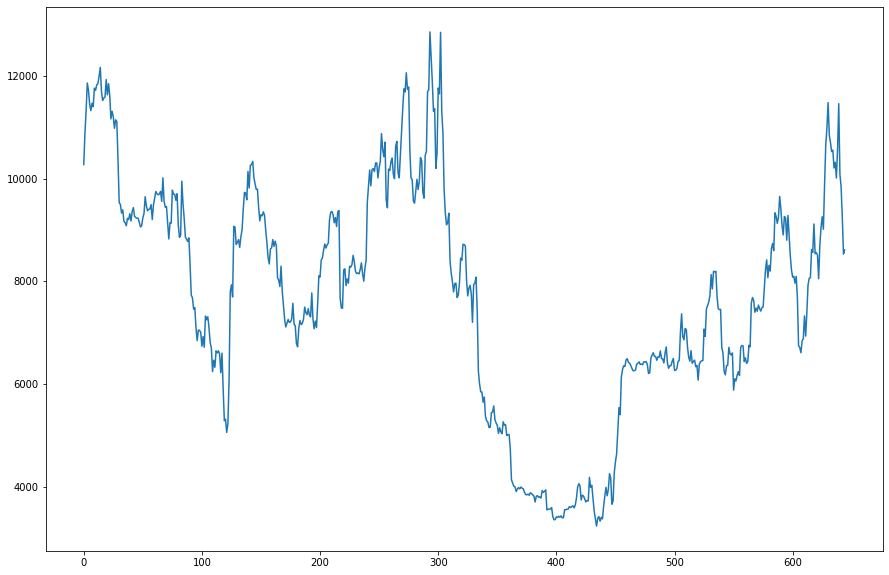

In [40]:
plt.figure(figsize=(15,10))
plt.plot(data.iloc[:,6])

In [41]:
np.argmax(data.return_brr)

216

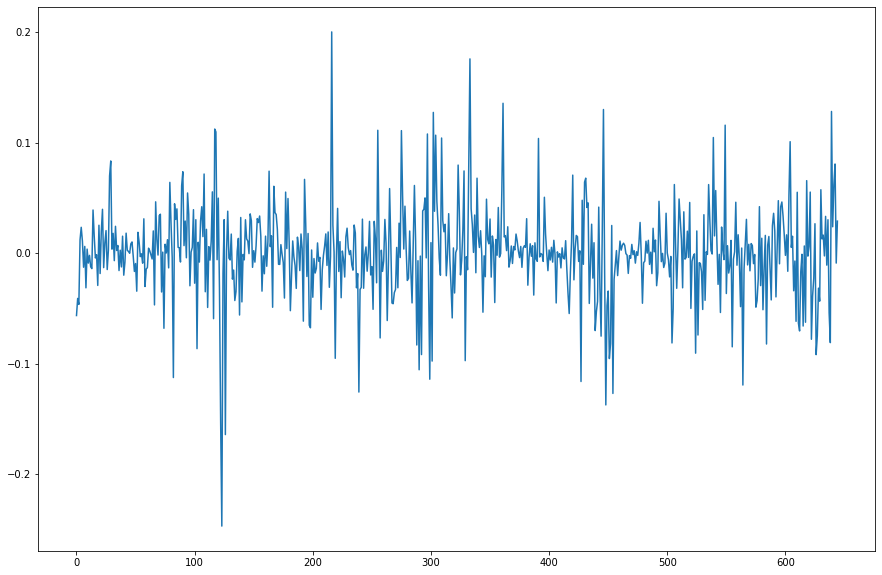

In [42]:
plt.figure(figsize=(15,10))
plt.plot(data.return_brr)

In [43]:
kde_brr.h_brot

0.02197382561545512

Text(0, 0.5, '$R^F$')

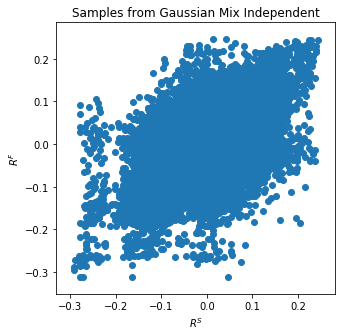

In [44]:
s = Gaussian_Mix_Independent(C7.paras, kde_brr, kde_btc).sample(100000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])
plt.title("Samples from Gaussian Mix Independent")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")

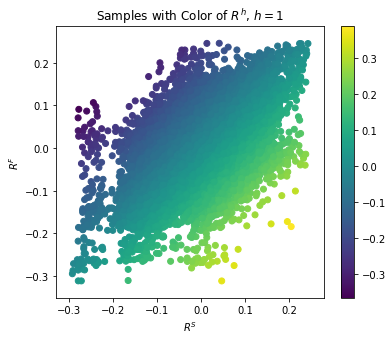

In [45]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=rh)
plt.title(r"Samples with Color of $R^h$, $h=1$")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

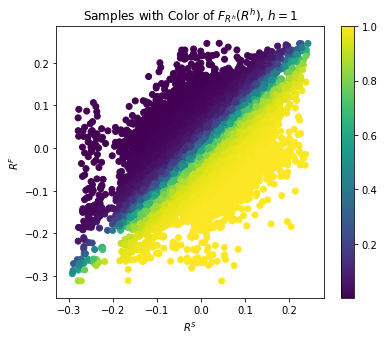

In [46]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=ECDF(rh)(rh))
plt.title(r"Samples with Color of $F_{R^h}(R^h)$, $h=1$")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

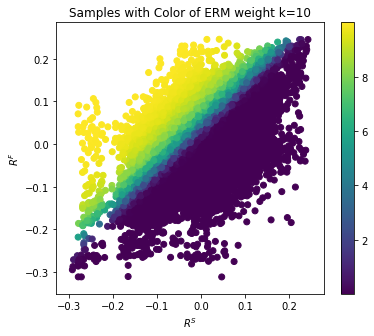

In [47]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=ERM_weight(10,ECDF(rh)(rh)))
plt.title(r"Samples with Color of ERM weight k=10")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()

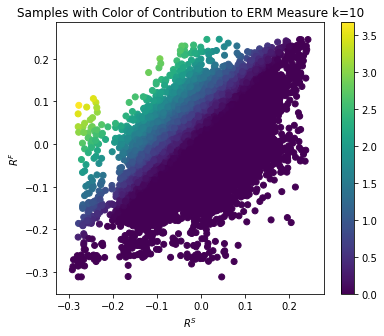

In [48]:
h=1
rh = s[:,0] - h*s[:,1]
plt.figure(figsize=(6,5))
plt.scatter(s[:,0],s[:,1],c=-ERM_weight(10,ECDF(rh)(rh))*rh)
plt.title(r"Samples with Color of Contribution to ERM Measure k=10")
plt.xlabel(r"$R^S$")
plt.ylabel(r"$R^F$")
plt.colorbar()